In [1]:
import numpy as np
from sklearn.cluster import KMeans
import json
import matplotlib.pyplot as plt

LABELS = "C:\\Repos\\coco\\coco2017\\annotations\\annotations.json"

with open(LABELS) as f:
    annotations = json.load(f)

# Extract bounding box coordinates
heights = []
widths = []
coordinates = []
for annotation in annotations.values():
    for ex in annotation:
        bbox = ex['bbox']
        height, width = int(bbox[3]), int(bbox[2])

        coordinates.append([height, width])
        heights.append(height)
        widths.append(width)

plt.scatter(heights, widths, s=0.01)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Repos\\coco\\coco2017\\annotations\\annotations.json'

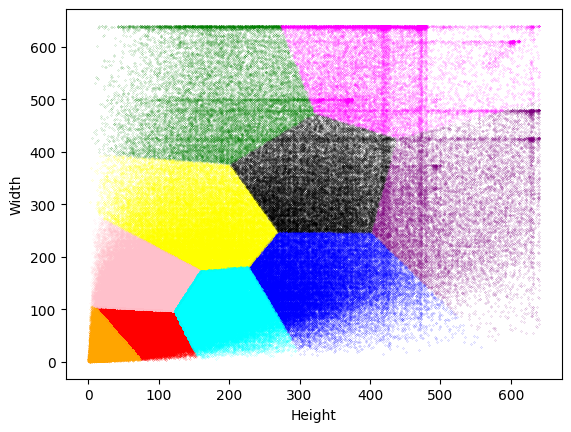

In [3]:
coordinates = np.array(coordinates)

# Perform k-means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)

# Assign each bounding box to its corresponding cluster
cluster_labels = kmeans.labels_

# Split coordinates by cluster
clustered_coordinates = []
for i in range(k):
    clustered_coordinates.append(coordinates[cluster_labels == i])

# Plot each cluster with different colors
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'black']   
for i, cluster in enumerate(clustered_coordinates):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=0.01, c=colors[i])

plt.xlabel('Height')
plt.ylabel('Width')
plt.show()